In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr


In [2]:
div_df_orginal = pd.read_csv('dividend_stocks_only.csv')

In [3]:
div_df = div_df_orginal.copy()

In [4]:
div_df.head()

,symbol,security_name,listing_exchange,etf,financial_status,zip,sector,fullTimeEmployees,city,state,...,enterpriseToRevenue,forwardEps,revenueQuarterlyGrowth,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend
0,A,"Agilent Technologies, Inc. Common Stock",N,N,NaN,95051,Healthcare,16300.0,Santa Clara,CA,...,4.987,3.57,NaN,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.18
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,N,76155,Industrials,131500.0,Fort Worth,TX,...,0.796,-0.04,NaN,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.10
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,NaN,27604,Consumer Cyclical,39000.0,Raleigh,NC,...,1.175,8.54,NaN,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.25
3,AAPL,Apple Inc. - Common Stock,Q,N,N,95014,Technology,137000.0,Cupertino,CA,...,5.108,14.73,NaN,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.82
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,NaN,92130,Real Estate,205.0,San Diego,CA,...,7.849,1.35,NaN,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.30


In [5]:
div_df.isna().sum()

symbol                            0
security_name                     0
listing_exchange                  0
etf                               0
financial_status               1305
zip                              20
sector                           13
fullTimeEmployees               569
city                              2
state                           157
country                           0
industry                         13
twoHundredDayAverage              0
trailingAnnualDividendYield     170
averageDailyVolume10Day           0
regularMarketPreviousClose        0
open                              0
averageVolume10days               0
dividendRate                      0
regularMarketVolume               0
marketCap                        17
averageVolume                     0
dayLow                            0
ask                               0
fiftyTwoWeekHigh                  0
forwardPE                       588
fiveYearAvgDividendYield        428
dividendYield               

In [6]:
div_df.shape

(1939, 40)

In [7]:
div_df.drop(['revenueQuarterlyGrowth','financial_status'],axis=1,inplace = True)

In [8]:
div_df.head()

,symbol,security_name,listing_exchange,etf,zip,sector,fullTimeEmployees,city,state,country,...,dayHigh,enterpriseToRevenue,forwardEps,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend
0,A,"Agilent Technologies, Inc. Common Stock",N,N,95051,Healthcare,16300.0,Santa Clara,CA,United States,...,86.48,4.987,3.57,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.18
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,76155,Industrials,131500.0,Fort Worth,TX,United States,...,12.55,0.796,-0.04,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.10
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,27604,Consumer Cyclical,39000.0,Raleigh,NC,United States,...,141.78,1.175,8.54,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.25
3,AAPL,Apple Inc. - Common Stock,Q,N,95014,Technology,137000.0,Cupertino,CA,United States,...,318.71,5.108,14.73,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.82
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,92130,Real Estate,205.0,San Diego,CA,United States,...,28.52,7.849,1.35,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.30


In [9]:
div_df.columns

Index(['symbol', 'security_name', 'listing_exchange', 'etf', 'zip', 'sector',
       'fullTimeEmployees', 'city', 'state', 'country', 'industry',
       'twoHundredDayAverage', 'trailingAnnualDividendYield',
       'averageDailyVolume10Day', 'regularMarketPreviousClose', 'open',
       'averageVolume10days', 'dividendRate', 'regularMarketVolume',
       'marketCap', 'averageVolume', 'dayLow', 'ask', 'fiftyTwoWeekHigh',
       'forwardPE', 'fiveYearAvgDividendYield', 'dividendYield', 'bidSize',
       'dayHigh', 'enterpriseToRevenue', 'forwardEps', 'bookValue',
       'sharesShort', 'shortRatio', 'floatShares', 'enterpriseValue',
       'regularMarketPrice', 'latest_dividend'],
      dtype='object')

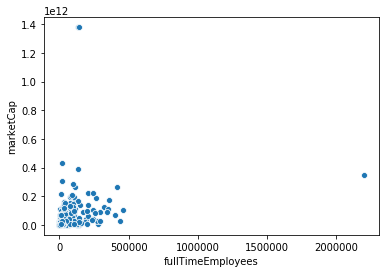

In [10]:
sns.scatterplot(data = div_df,x=div_df['fullTimeEmployees'],y=div_df['marketCap'])

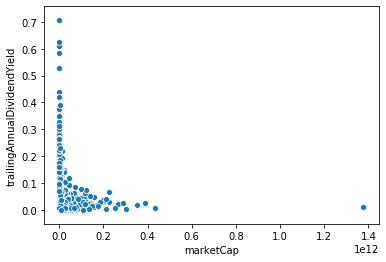

In [11]:
sns.scatterplot(data = div_df,x=div_df['marketCap'],y=div_df['trailingAnnualDividendYield'])

In [12]:
div_df['etf'].unique()

array(['N'], dtype=object)

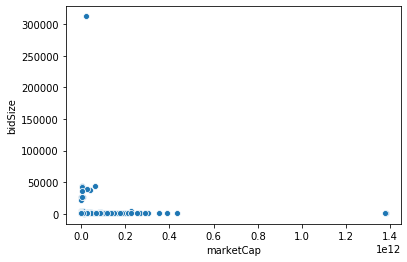

In [13]:
sns.scatterplot(data = div_df,x=div_df['marketCap'],y=div_df['bidSize'])

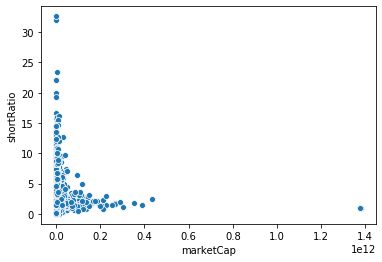

In [14]:
sns.scatterplot(data = div_df,x=div_df['marketCap'],y=div_df['shortRatio'])

In [15]:
div_df.isna().sum()

symbol                           0
security_name                    0
listing_exchange                 0
etf                              0
zip                             20
sector                          13
fullTimeEmployees              569
city                             2
state                          157
country                          0
industry                        13
twoHundredDayAverage             0
trailingAnnualDividendYield    170
averageDailyVolume10Day          0
regularMarketPreviousClose       0
open                             0
averageVolume10days              0
dividendRate                     0
regularMarketVolume              0
marketCap                       17
averageVolume                    0
dayLow                           0
ask                              0
fiftyTwoWeekHigh                 0
forwardPE                      588
fiveYearAvgDividendYield       428
dividendYield                    1
bidSize                          0
dayHigh             

In [16]:
# Remove outliers from dataset

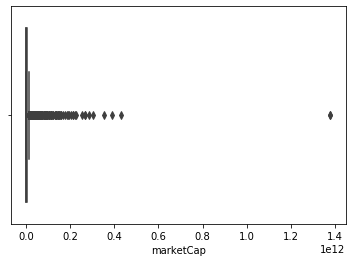

In [17]:
sns.boxplot(x= div_df['marketCap'])

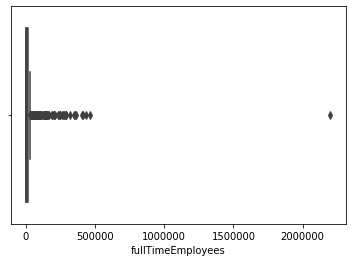

In [18]:
sns.boxplot(x= div_df['fullTimeEmployees'])

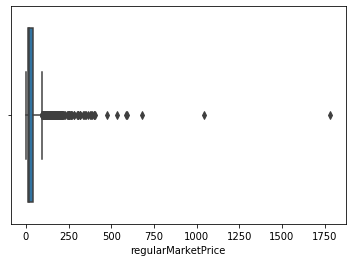

In [19]:
sns.boxplot(x= div_df['regularMarketPrice'])

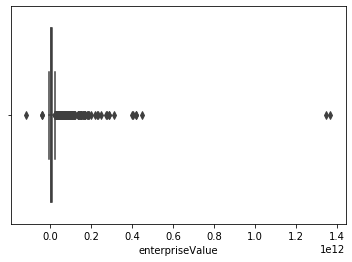

In [20]:
sns.boxplot(x= div_df['enterpriseValue'])

In [21]:
# One thing I may think of doing is filling in the null values with data before removing outliers.

In [22]:
# Get max and min full time employees
print(div_df['fullTimeEmployees'].min())
print(div_df['fullTimeEmployees'].max())

1.0
2200000.0


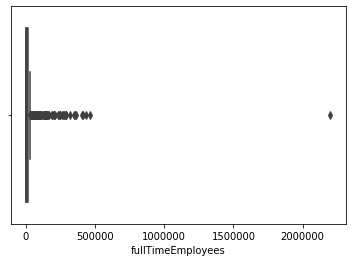

In [23]:
sns.boxplot(x= div_df['fullTimeEmployees'])

In [24]:
div_df = div_df[div_df.fullTimeEmployees != 2200000]

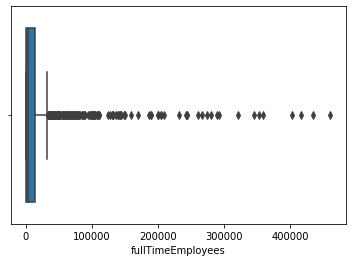

In [25]:
sns.boxplot(x= div_df['fullTimeEmployees'])

In [26]:
div_df['fullTimeEmployees'].fillna(value=np.random.uniform(1,100000), inplace=True)

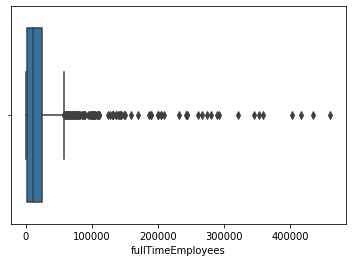

In [27]:
sns.boxplot(x= div_df['fullTimeEmployees'])

In [28]:
iqr(div_df['fullTimeEmployees'])

22447.97236837543

In [29]:
div_df['fullTimeEmployees'].describe()

count      1938.000000
mean      19348.956284
std       37922.427278
min           1.000000
25%        1300.000000
50%       10500.000000
75%       23747.972368
max      460724.000000
Name: fullTimeEmployees, dtype: float64

In [30]:
# Outliers = Observations > Q3 + 1.5*IQR  or  Q1 – 1.5*IQR

In [31]:
Q1fte = div_df['fullTimeEmployees'].quantile(0.25)
Q3fte = div_df['fullTimeEmployees'].quantile(0.75)
IQR = Q3fte-Q1fte

In [32]:
print(div_df['fullTimeEmployees'] < (Q1fte - 1.5 * IQR))

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1909    False
1910    False
1911    False
1912    False
1913    False
1914    False
1915    False
1916    False
1917    False
1918    False
1919    False
1920    False
1921    False
1922    False
1923    False
1924    False
1925    False
1926    False
1927    False
1928    False
1929    False
1930    False
1931    False
1932    False
1933    False
1934    False
1935    False
1936    False
1937    False
1938    False
Name: fullTimeEmployees, Length: 1938, dtype: bool


In [33]:
# Find a way to group companies by size

In [34]:
div_df.head()

,symbol,security_name,listing_exchange,etf,zip,sector,fullTimeEmployees,city,state,country,...,dayHigh,enterpriseToRevenue,forwardEps,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend
0,A,"Agilent Technologies, Inc. Common Stock",N,N,95051,Healthcare,16300.0,Santa Clara,CA,United States,...,86.48,4.987,3.57,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.18
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,76155,Industrials,131500.0,Fort Worth,TX,United States,...,12.55,0.796,-0.04,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.10
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,27604,Consumer Cyclical,39000.0,Raleigh,NC,United States,...,141.78,1.175,8.54,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.25
3,AAPL,Apple Inc. - Common Stock,Q,N,95014,Technology,137000.0,Cupertino,CA,United States,...,318.71,5.108,14.73,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.82
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,92130,Real Estate,205.0,San Diego,CA,United States,...,28.52,7.849,1.35,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.30


In [35]:
div_df['sector'].value_counts()

Financial Services        879
Industrials               214
Real Estate               170
Energy                    121
Consumer Cyclical         108
Technology                107
Basic Materials            95
Utilities                  68
Consumer Defensive         68
Healthcare                 49
Communication Services     45
Financial                   1
Name: sector, dtype: int64

In [36]:
div_df['industry'].value_counts(True)

Asset Management                          0.231169
Banks—Regional                            0.153247
Oil & Gas Midstream                       0.024416
Specialty Industrial Machinery            0.021818
Oil & Gas E&P                             0.017143
Insurance—Property & Casualty             0.014545
REIT—Mortgage                             0.014545
Utilities—Regulated Electric              0.013506
Specialty Chemicals                       0.012987
Credit Services                           0.012468
REIT—Diversified                          0.011948
Capital Markets                           0.010909
Software—Application                      0.010390
REIT—Industrial                           0.010390
Semiconductors                            0.009870
REIT—Office                               0.009351
REIT—Residential                          0.008831
Aerospace & Defense                       0.008831
Telecom Services                          0.008831
REIT—Retail                    

In [37]:
div_df['fullTimeEmployees'].sort_values()

813          1.0
1481         1.0
1041         1.0
1310         2.0
1318         3.0
1348         3.0
590          4.0
1589         9.0
1375         9.0
1281        10.0
1625        11.0
725         12.0
703         12.0
1662        13.0
1663        13.0
271         13.0
1661        13.0
944         15.0
1178        16.0
979         16.0
1270        17.0
1720        18.0
882         19.0
1658        19.0
380         20.0
1236        20.0
1508        21.0
1459        22.0
1100        22.0
1551        23.0
          ...   
421     149000.0
460     150000.0
1148    159000.0
287     170000.0
306     187041.0
87      189348.0
94      189348.0
1093    200000.0
976     200000.0
1128    205000.0
774     205000.0
159     209000.0
1869    232000.0
950     242371.0
1580    243200.0
1718    244000.0
1816    260280.0
1435    267000.0
357     274172.0
118     280000.0
470     290000.0
453     291700.0
712     320379.0
1608    346000.0
926     352600.0
1752    359542.0
1657    402206.0
856     415700

In [38]:
company_size_key = {'small': 100 ,'medium': 1000 , 'large': 1000000}

In [39]:
div_df.head()

,symbol,security_name,listing_exchange,etf,zip,sector,fullTimeEmployees,city,state,country,...,dayHigh,enterpriseToRevenue,forwardEps,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend
0,A,"Agilent Technologies, Inc. Common Stock",N,N,95051,Healthcare,16300.0,Santa Clara,CA,United States,...,86.48,4.987,3.57,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.18
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,76155,Industrials,131500.0,Fort Worth,TX,United States,...,12.55,0.796,-0.04,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.10
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,27604,Consumer Cyclical,39000.0,Raleigh,NC,United States,...,141.78,1.175,8.54,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.25
3,AAPL,Apple Inc. - Common Stock,Q,N,95014,Technology,137000.0,Cupertino,CA,United States,...,318.71,5.108,14.73,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.82
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,92130,Real Estate,205.0,San Diego,CA,United States,...,28.52,7.849,1.35,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.30


In [40]:
div_df['newcol'] = div_df['fullTimeEmployees']

In [41]:
div_df.head()

,symbol,security_name,listing_exchange,etf,zip,sector,fullTimeEmployees,city,state,country,...,enterpriseToRevenue,forwardEps,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend,newcol
0,A,"Agilent Technologies, Inc. Common Stock",N,N,95051,Healthcare,16300.0,Santa Clara,CA,United States,...,4.987,3.57,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.18,16300.0
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,76155,Industrials,131500.0,Fort Worth,TX,United States,...,0.796,-0.04,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.10,131500.0
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,27604,Consumer Cyclical,39000.0,Raleigh,NC,United States,...,1.175,8.54,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.25,39000.0
3,AAPL,Apple Inc. - Common Stock,Q,N,95014,Technology,137000.0,Cupertino,CA,United States,...,5.108,14.73,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.82,137000.0
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,92130,Real Estate,205.0,San Diego,CA,United States,...,7.849,1.35,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.30,205.0


In [42]:
div_df['size'] = div_df['newcol']

In [43]:
div_df.shape

(1938, 40)

In [44]:
div_df[div_df['size']<100].shape

(97, 40)

In [45]:
#def emp_bins(x):
#    
#    emp_bins = ['100-','100+','1000+']
#    
#    for i,n in enumerate(range(0,100000,1000)):
#        if x < n:
#            return emp_bins[i]
#

In [46]:
#div_df['size'] =div_df['size'].map(lambda x: emp_bins(x))
#rides_temp_df.rename(columns={'temp':'temp_bins'})

In [47]:
small = div_df[div_df['size']<100]

In [49]:
medium = div_df[(div_df['size']>=100)&(div_df['size']<999)]

In [50]:
large = div_df[div_df['size']>999]

In [51]:
print(small.shape)
print(medium.shape)
print(large.shape)

(97, 40)
(343, 40)
(1498, 40)


In [52]:
small.head()

,symbol,security_name,listing_exchange,etf,zip,sector,fullTimeEmployees,city,state,country,...,forwardEps,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend,newcol,size
12,AC,"Associated Capital Group, Inc. Common Stock",N,N,10580,Financial Services,39.0,Rye,NY,United States,...,2.59,36.611,196192.0,10.61,3337299.0,4.792149e+08,42.11,0.100,39.0,39.0
23,ADC,Agree Realty Corporation Common Stock,N,N,48304,Real Estate,41.0,Bloomfield Hills,MI,United States,...,1.76,37.483,7650448.0,8.52,45892725.0,4.230171e+09,66.35,0.585,41.0,41.0
47,AGNC,AGNC Investment Corp. - Common Stock,Q,N,20814,Real Estate,51.0,Bethesda,MD,United States,...,1.91,14.636,13832623.0,1.00,555558553.0,6.859663e+10,13.61,0.120,51.0,51.0
48,AGNCM,AGNC Investment Corp. - Depositary Shares rep ...,Q,N,20814,Real Estate,51.0,Bethesda,MD,United States,...,NaN,14.636,NaN,NaN,555558553.0,7.422655e+10,22.72,0.430,51.0,51.0
49,AGNCN,AGNC Investment Corp. - Depositary Shares Each...,Q,N,20814,Real Estate,51.0,Bethesda,MD,United States,...,NaN,14.636,NaN,NaN,555558553.0,7.453420e+10,23.44,0.438,51.0,51.0


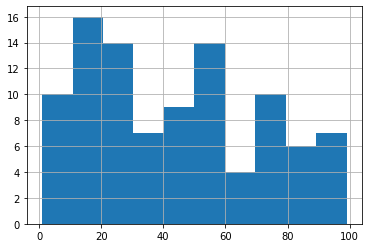

In [53]:
small['fullTimeEmployees'].hist()

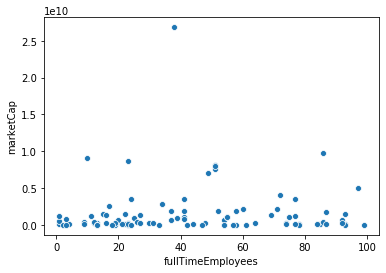

In [57]:
sns.scatterplot(data = small, x= small['fullTimeEmployees'],y=small['marketCap'])

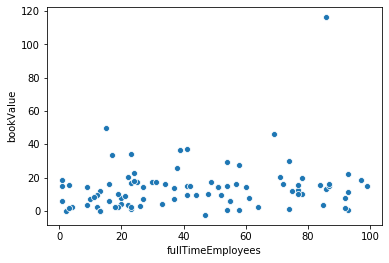

In [58]:
sns.scatterplot(data = small, x= small['fullTimeEmployees'],y=small['bookValue'])

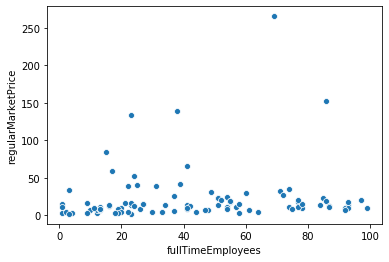

In [59]:
sns.scatterplot(data = small, x= small['fullTimeEmployees'],y=small['regularMarketPrice'])

In [ ]:
sns.scatterplot(data = small, x= small['fullTimeEmployees'],y=small['regularMarketPrice'])

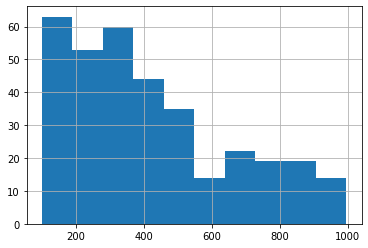

In [54]:
medium['fullTimeEmployees'].hist()

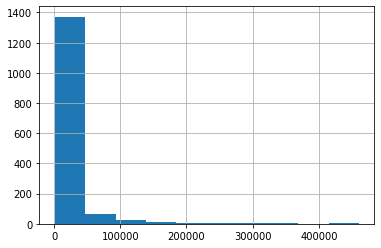

In [55]:
large['fullTimeEmployees'].hist()